# 4.10 Task Part 1 cont

### Import libraries and create path

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Create path
path = r'C:\Users\jeffr\Documents\Instacart Basket Analysis'

In [6]:
#import df_cop data set
df_cop = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'df_cop4.pkl'))

In [6]:
df_cop.shape

(30964564, 38)

In [4]:
df_cop.drop(columns='_merge')

,order_id,user_id,order_number,orders_day_of_week,order_time_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,age,date_joined,number_of_dependants,marital_status,income,region,activity_flag,income_group,age_group,dependants_flag
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,31,2/17/2019,3,married,40423,South,High-activity Customer,low-income,adult,Yes Dependants
1,2539329,1,1,2,8,NaN,14084,2,0,Organic Unsweetened Vanilla Almond Milk,...,31,2/17/2019,3,married,40423,South,High-activity Customer,low-income,adult,Yes Dependants
2,2539329,1,1,2,8,NaN,12427,3,0,Original Beef Jerky,...,31,2/17/2019,3,married,40423,South,High-activity Customer,low-income,adult,Yes Dependants
3,2539329,1,1,2,8,NaN,26088,4,0,Aged White Cheddar Popcorn,...,31,2/17/2019,3,married,40423,South,High-activity Customer,low-income,adult,Yes Dependants
4,2539329,1,1,2,8,NaN,26405,5,0,XL Pick-A-Size Paper Towel Rolls,...,31,2/17/2019,3,married,40423,South,High-activity Customer,low-income,adult,Yes Dependants
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32404854,2977660,206209,13,1,12,7.0,14197,5,1,Tomato Paste,...,74,9/14/2019,3,married,137969,Midwest,High-activity Customer,middle-income,senior,Yes Dependants
32404855,2977660,206209,13,1,12,7.0,38730,6,0,Brownie Crunch High Protein Bar,...,74,9/14/2019,3,married,137969,Midwest,High-activity Customer,middle-income,senior,Yes Dependants
32404856,2977660,206209,13,1,12,7.0,31477,7,0,High Protein Bar Chunky Peanut Butter,...,74,9/14/2019,3,married,137969,Midwest,High-activity Customer,middle-income,senior,Yes Dependants
32404857,2977660,206209,13,1,12,7.0,6567,8,0,Chocolate Peanut Butter Protein Bar,...,74,9/14/2019,3,married,137969,Midwest,High-activity Customer,middle-income,senior,Yes Dependants


In [8]:
#Checking so see if _merge column was dropped
df_cop.columns

Index(['order_id', 'user_id', 'order_number', 'orders_day_of_week',
       'order_time_of_day', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'reordered', 'product_name', 'aisle_id',
       'department_id', 'prices', 'price_range_loc', 'prices_range_loc',
       'busiest_day', 'busiest_days', 'busiest_period_of_day', 'max_order',
       'loyalty_flag', 'average_price', 'spending_flag', 'frequency_flag',
       'first_name', 'last_name', 'gender', 'state', 'age', 'date_joined',
       'number_of_dependants', 'marital_status', 'income', '_merge', 'region',
       'activity_flag', 'income_group', 'age_group', 'dependants_flag'],
      dtype='object')

In [9]:
# Save revised data set.
df_cop.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'df_cop4.pkl'))

### Import departments dataframe and merge with df_cop

In [3]:
# Import departments_wrangled df
departments=pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'departments_wrangled.csv'))

In [11]:
# Check departments df columns
departments.columns

Index(['Unnamed: 0', 'department'], dtype='object')

In [4]:
# Change 'Unnamed:0' to 'department_id'
departments.rename(columns = {'Unnamed: 0' : 'department_id'}, inplace=True)

In [13]:
# Check column name change 
departments

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [17]:
departments.dtypes

department_id     int64
department       object
dtype: object

In [5]:
# Changing departments 'department_id' to object
departments['department_id'] = departments['department_id'].astype('str')

In [19]:
# Check reult
departments.dtypes

department_id    object
department       object
dtype: object

In [7]:
# Use department_id to merge df_cop and departments dataframes
df_merge = df_cop.merge(departments, on='department_id', indicator='created')

In [8]:
# Save revised dataframe
df_merge.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'df_cop_dept.pkl'))

In [10]:
df_merge.shape

(30964564, 40)

In [11]:
df_merge.columns

Index(['order_id', 'user_id', 'order_number', 'orders_day_of_week',
       'order_time_of_day', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'reordered', 'product_name', 'aisle_id',
       'department_id', 'prices', 'price_range_loc', 'prices_range_loc',
       'busiest_day', 'busiest_days', 'busiest_period_of_day', 'max_order',
       'loyalty_flag', 'average_price', 'spending_flag', 'frequency_flag',
       'first_name', 'last_name', 'gender', 'state', 'age', 'date_joined',
       'number_of_dependants', 'marital_status', 'income', '_merge', 'region',
       'activity_flag', 'income_group', 'age_group', 'dependants_flag',
       'department', 'created'],
      dtype='object')

In [21]:
df_merge['price_range_loc'].value_counts(dropna=False)

price_range_loc
Mid-range product     20891771
NaN                    9674840
High-range product      397953
Name: count, dtype: int64

In [16]:
df_merge.dtypes

order_id                    object
user_id                     object
order_number                 int64
orders_day_of_week           int64
order_time_of_day            int64
days_since_prior_order     float64
product_id                  object
add_to_cart_order            int64
reordered                    int64
product_name                object
aisle_id                    object
department_id               object
prices                     float64
price_range_loc             object
prices_range_loc            object
busiest_day                 object
busiest_days                object
busiest_period_of_day       object
max_order                    int64
loyalty_flag                object
average_price              float64
spending_flag               object
frequency_flag              object
first_name                  object
last_name                   object
gender                      object
state                       object
age                          int64
date_joined         

### Number 7 - Aggregate the max, mean, and min variables on a customer profile level for usage frequency and expenditure

In [27]:
# Create an aggregated subset with the sum of each order
df_profile = df_merge.groupby(['user_id','order_number','price_range_loc','loyalty_flag','spending_flag','activity_flag','frequency_flag','region','gender','age_group','income_group','marital_status','dependants_flag','days_since_prior_order'],as_index=False)['prices'].sum(numeric_only=True)

In [28]:
# Check result
df_profile.columns

Index(['user_id', 'order_number', 'price_range_loc', 'loyalty_flag',
       'spending_flag', 'activity_flag', 'frequency_flag', 'region', 'gender',
       'age_group', 'income_group', 'marital_status', 'dependants_flag',
       'days_since_prior_order', 'prices'],
      dtype='object')

In [26]:
# Usage frequency and expenditure by age group
df_profile.groupby('age_group').agg({'days_since_prior_order':['max', 'min', 'mean'], 'prices': ['max', 'min', 'mean']})

days_since_prior_order                prices                
                               max  min      mean    max  min       mean
age_group                                                               
adult                         30.0  0.0  9.200868  718.1  0.0  63.838109
middle-aged                   30.0  0.0  9.175671  762.4  0.0  63.043371
senior                        30.0  0.0  9.167616  651.1  0.0  63.226891
young adult                   30.0  0.0  9.113174  728.3  0.0  63.147358

In [31]:
# Usage frequency and expenditure by income group
df_profile.groupby('income_group').agg({'days_since_prior_order': ['max', 'min', 'mean'], 'prices': ['max','min','mean']})

days_since_prior_order                prices                
                                 max  min      mean    max  min       mean
income_group                                                              
high-income                     30.0  0.0  8.987924  569.1  0.0  65.658974
low-income                      30.0  0.0  9.687204  728.3  5.1  48.635270
middle-income                   30.0  0.0  9.094679  762.4  0.0  66.065140

In [33]:
# Usage frequency and expenditure by dependant status
df_profile.groupby('dependants_flag').agg({'days_since_prior_order': ['max', 'min', 'mean'], 'prices': ['max', 'min', 'mean']})

days_since_prior_order                prices                
                                   max  min      mean    max  min       mean
dependants_flag                                                             
No Dependants                     30.0  0.0  9.153815  651.1  0.0  63.320489
Yes Dependants                    30.0  0.0  9.179730  762.4  0.0  63.305579

In [34]:
# Usage frequency and expenditure by loyalty status
df_profile.groupby('loyalty_flag').agg({'days_since_prior_order': ['max', 'min', 'mean'], 'prices': ['max', 'min', 'mean']})

days_since_prior_order                 prices                
                                    max  min       mean    max  min       mean
loyalty_flag                                                                  
Loyal Customer                     30.0  0.0   5.581477  728.3  0.0  63.360928
New Customer                       30.0  0.0  17.818723  718.1  0.0  62.143547
Regualr Customer                   30.0  0.0  10.303541  762.4  0.0  63.590292

In [35]:
# Usage frequency and expenditure by spender type
df_profile.groupby('spending_flag').agg({'days_since_prior_order': ['max', 'min', 'mean'], 'prices': ['max', 'min', 'mean']})

days_since_prior_order                prices                
                                 max  min      mean    max  min       mean
spending_flag                                                             
High Spender                    30.0  0.0  9.264833  605.3  0.0  55.031594
Low Spender                     30.0  0.0  9.171032  762.4  5.1  63.511967

In [36]:
# Usage frequency and expenditure by region
df_profile.groupby('region').agg({'days_since_prior_order': ['max', 'min', 'mean'], 'prices': ['max', 'min', 'mean']})

days_since_prior_order                prices                
                             max  min      mean    max  min       mean
region                                                                
Midwest                     30.0  0.0  9.246835  631.1  0.0  63.150413
Northeast                   30.0  0.0  9.105938  634.3  0.0  63.242671
South                       30.0  0.0  9.186107  762.4  0.0  63.323596
West                        30.0  0.0  9.135628  650.8  0.0  63.481247

In [37]:
# Usage and frequency and expenditure by marital status
df_profile.groupby('marital_status').agg({'days_since_prior_order': ['max', 'min', 'mean'], 'prices': ['max', 'min', 'mean']})

days_since_prior_order                prices  \
                                                    max  min      mean    max   
marital_status                                                                  
divorced/widowed                                   30.0  0.0  9.167334  651.1   
living with parents and siblings                   30.0  0.0  9.178205  702.9   
married                                            30.0  0.0  9.179835  762.4   
single                                             30.0  0.0  9.146790  603.8   

                                                  
                                  min       mean  
marital_status                                    
divorced/widowed                  0.0  63.699751  
living with parents and siblings  0.0  63.640263  
married                           0.0  63.282509  
single                            0.0  63.123416

### Numbers 8 & 9 - Compare customer profiels with regions and departments. Produce sutiable charts to illustrate results.

([<matplotlib.axis.XTick at 0x136fd7b1040>,
 [Text(0, 0, '0'),
  Text(2000000, 0, '2000000'),
  Text(4000000, 0, '4000000'),
  Text(6000000, 0, '6000000'),
  Text(8000000, 0, '8000000')])

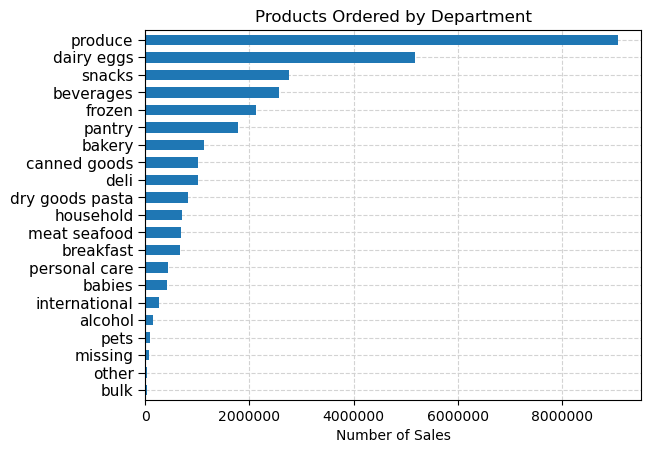

In [42]:
#Create distribution of products ordered by department bar chart.
dept_counts = df_merge['department'].value_counts(dropna=False, ascending=True)
dept_counts_bar = dept_counts.plot.barh(width=0.6)
plt.gca().set_axisbelow(True)
plt.grid(axis='both', color='lightgray', linestyle='dashed')
plt.title('Products Ordered by Department')
plt.ylabel('',weight='black')
plt.xlabel('Number of Sales')
plt.yticks(fontsize=11)
plt.tick_params(axis= 'y', length=5)
plt.xticks(np.arange(0, 10000000, 2000000),
          [int(value) if np.floor(value)==value else value for value in np.arange(0, 10000000, 2000000)])

In [43]:
# Export 'dept_counts_bar' chart
dept_counts_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'dept_counts_bar.png'))

([<matplotlib.axis.XTick at 0x13704d00800>,
 [Text(0, 0, '0'),
  Text(2000000, 0, '2000000'),
  Text(4000000, 0, '4000000'),
  Text(6000000, 0, '6000000'),
  Text(8000000, 0, '8000000')])

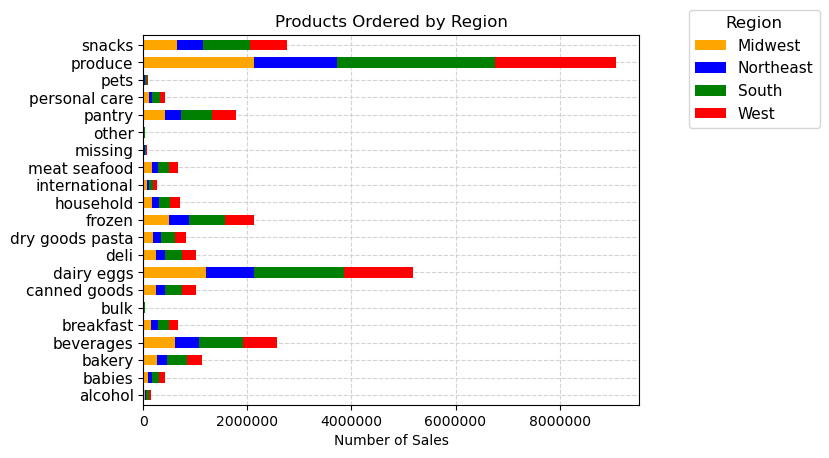

In [48]:
# Create Region vs products ordered by department chart
colors = ['orange', 'blue', 'green', 'red', 'purple']
dept_region_cross=pd.crosstab(df_merge['department'], df_merge['region'], dropna=False)
dept_region_bar=dept_region_cross.plot.barh(color=colors, stacked=True, width=0.6)
leg=plt.legend(loc=(1.1,0.75), title='Region', title_fontsize=12, fontsize=11)
for text in leg.get_texts():
    text.set_color('black')
plt.gca().set_axisbelow(True)
plt.grid(axis='both', color='lightgray', linestyle='dashed')
plt.title('Products Ordered by Region')
plt.ylabel('',weight='black')
plt.xlabel('Number of Sales')
plt.yticks(fontsize=11)
plt.xticks(np.arange(0, 10000000, 2000000),
           [int(value) if np.floor(value)==value else value for value in np.arange(0, 10000000, 2000000)])

In [49]:
# Exporting dept_region_bar chart
dept_region_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'dept_region_bar.png'))

([<matplotlib.axis.YTick at 0x137052db020>,
 [Text(0, 0, '0'),
  Text(0, 500000, '500000'),
  Text(0, 1000000, '1000000'),
  Text(0, 1500000, '1500000'),
  Text(0, 2000000, '2000000'),
  Text(0, 2500000, '2500000'),
  Text(0, 3000000, '3000000')])

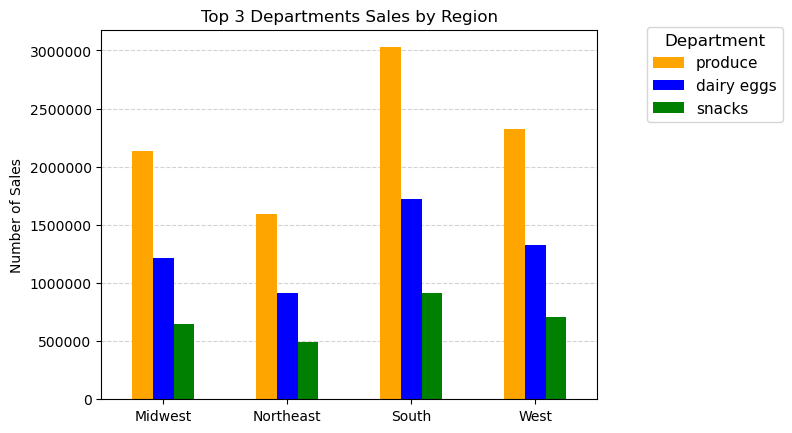

In [53]:
# Create top three departments by region
top_dept_bar=df_merge.groupby(df_merge['region'])['department'].value_counts().groupby('region').head(3).unstack().plot.bar(color=colors)
leg=plt.legend(loc=(1.1,0.75),title='Department', title_fontsize=12, fontsize=11)
for text in leg.get_texts():
    text.set_color('black')
plt.gca().set_axisbelow(True)
plt.grid(axis='y', color='lightgray', linestyle='dashed')
plt.title('Top 3 Departments Sales by Region')
plt.xlabel('')
plt.ylabel('Number of Sales')
plt.xticks(rotation=0)
plt.yticks(np.arange(0, 3500000, 500000),
           [int(value) if np.floor(value)==value else value for value in np.arange(0, 3500000, 500000)])

In [54]:
# Export top_dept_bar chart
top_dept_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'top_dept_region.png'))

([<matplotlib.axis.XTick at 0x137059c6480>,
 [Text(0, 0, '0'),
  Text(2000000, 0, '2000000'),
  Text(4000000, 0, '4000000'),
  Text(6000000, 0, '6000000'),
  Text(8000000, 0, '8000000')])

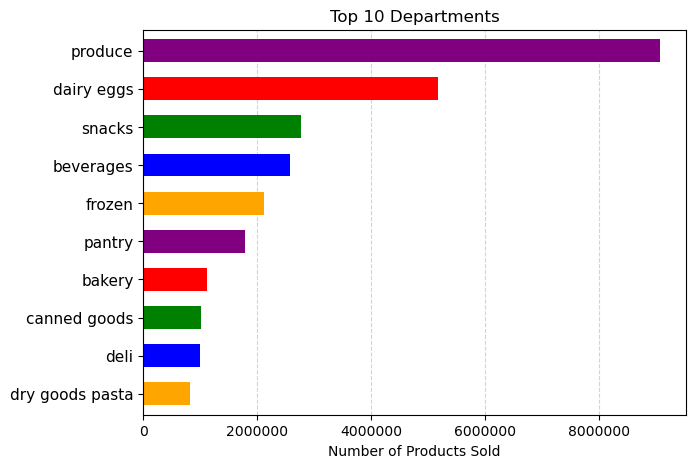

In [57]:
# Create top 10 departments bar chart
fig=plt.figure(figsize=(7,5))
plt.subplot(1,1,1)
top_10_depts=df_merge['department'].value_counts(dropna=False, ascending=False).head(10)
top_10_dept_bar=top_10_depts.sort_values().plot.barh(width=0.6, color=colors)
plt.gca().set_axisbelow(True)
plt.grid(axis='x', color='lightgray', linestyle='dashed')
plt.title('Top 10 Departments')
plt.xlabel('Number of Products Sold')
plt.ylabel('')
plt.yticks(fontsize=11)
plt.xticks(np.arange(0, 10000000, 2000000),
           [int(value) if np.floor(value)==value else value for value in np.arange(0, 10000000, 2000000)])


In [58]:
# Export top_dept_bar chart
top_dept_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'top_dept_bar.png'))

([<matplotlib.axis.YTick at 0x13705c12e70>,
 [Text(0, 0, '0'),
  Text(0, 2000000, '2000000'),
  Text(0, 4000000, '4000000'),
  Text(0, 6000000, '6000000')])

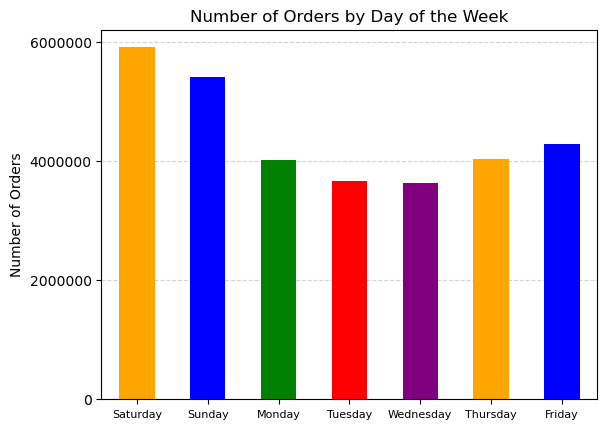

In [61]:
# Create Orders by day of the week bar chart
orders_day_bar=df_merge['orders_day_of_week'].value_counts().sort_index().plot.bar(color=colors)
plt.gca().set_axisbelow(True)
plt.grid(axis='y', color='lightgray', linestyle='dashed')
plt.title('Number of Orders by Day of the Week')
plt.ylabel('Number of Orders')
plt.xlabel('')
plt.xticks([0,1,2,3,4,5,6,],['Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'], rotation=0, fontsize=8)
plt.yticks(np.arange(0, 8000000, 2000000),
           [int(value) if np.floor(value)==value else value for value in np.arange(0, 8000000, 2000000)])

In [63]:
df_merge['orders_day_of_week'].value_counts()

orders_day_of_week
0    5908610
1    5411686
6    4291304
5    4033729
2    4024706
3    3669535
4    3624994
Name: count, dtype: int64

In [64]:
# Export orders_day_bar chart
orders_day_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'orders_day_bar.png'))

([<matplotlib.axis.YTick at 0x13705c02e70>,
 [Text(0, 0, '0'),
  Text(0, 500000, '500000'),
  Text(0, 1000000, '1000000'),
  Text(0, 1500000, '1500000'),
  Text(0, 2000000, '2000000'),
  Text(0, 2500000, '2500000')])

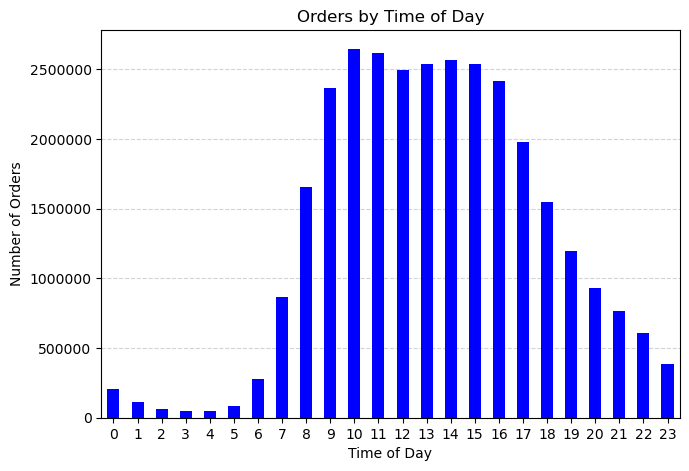

In [65]:
# Create number of orders per hour chart
order_hour_bar=df_merge['order_time_of_day'].value_counts().sort_index().plot.bar(color='blue')
plt.gca().set_axisbelow(True)
plt.grid(axis='y', color='lightgray', linestyle='dashed')
plt.tight_layout()
plt.title('Orders by Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Number of Orders')
plt.xticks(rotation=0, fontsize=10)
plt.yticks(np.arange(0, 3000000, 500000),
           [int(value) if np.floor(value)==value else value for value in np.arange(0, 3000000, 500000)])

In [66]:
# Export order_hour_bar chart
order_hour_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'order_hour_bar.png'))

([<matplotlib.axis.YTick at 0x13705c91730>,
 [Text(0, 0, '0'),
  Text(0, 1000000, '1000000'),
  Text(0, 2000000, '2000000'),
  Text(0, 3000000, '3000000'),
  Text(0, 4000000, '4000000'),
  Text(0, 5000000, '5000000'),
  Text(0, 6000000, '6000000')])

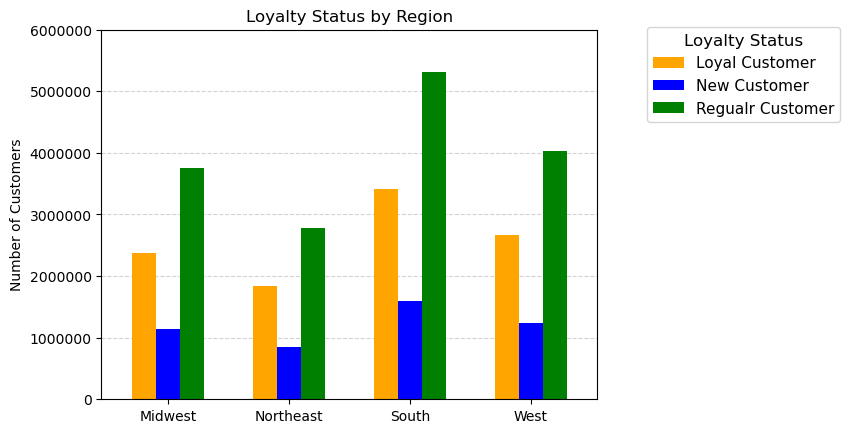

In [67]:
# Create loyalty status by region
loyalty_region_bar=pd.crosstab(df_merge['region'], df_merge['loyalty_flag'], dropna=False).plot.bar(width=0.6, color=colors)
leg=plt.legend(loc=(1.1,0.75), title='Loyalty Status', title_fontsize=12, fontsize=11)
for text in leg.get_texts():
    text.set_color('black')
plt.gca().set_axisbelow(True)
plt.grid(axis='y', color='lightgray', linestyle='dashed')
plt.title('Loyalty Status by Region')
plt.ylabel('Number of Customers')
plt.xlabel('',weight='black')
plt.xticks(rotation=0)
plt.yticks(np.arange(0, 7000000, 1000000),
           [int(value) if np.floor(value)==value else value for value in np.arange(0, 7000000, 1000000)])

In [68]:
# Export loyalty_region_bar chart
loyalty_region_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'loyalty_region_bar.png'))

In [89]:
df_merge['dependants_flag'].value_counts()

dependants_flag
Yes Dependants    23224883
No Dependants      7739681
Name: count, dtype: int64